In [122]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
matplotlib.rc('animation', html='html5')
%matplotlib inline
from IPython.display import HTML

In [123]:
def sort_func(string):
    return int(string.split(".")[1])

def plot(array_name, vec_ind=0, step=10):
    charge_density = [name for name in os.listdir(os.getcwd()) if array_name in name]
    data = [np.loadtxt(name) for name in sorted(charge_density, key=sort_func)]
    x = np.arange(len(data[0]))
    fig, ax = plt.subplots()
    if len(data[i].shape) > 1:
        line, = ax.plot(x, data[i][:,vec_ind])
    else:
        line, = ax.plot(x, data[i])
    ax.set_title(array_name)
    def init():
        line.set_data([], [])
        return line,
    def animate(i):
        if len(data[i].shape) > 1:
            line.set_data(x, data[i][:,vec_ind])
        else:
            line.set_data(x, data[i])
        return line,
    
    anim = animation.FuncAnimation(fig, animate, frames = range(0, 1000, step),
                                   init_func = init, blit=True, interval=30)
    return HTML(anim.to_html5_video())

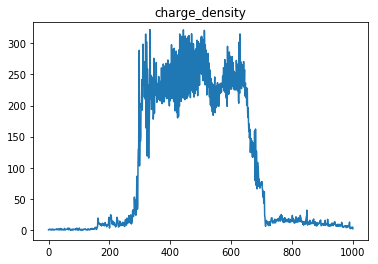

In [124]:
plot("charge_density")

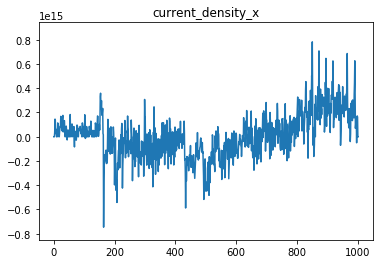

In [125]:
plot("current_density_x")

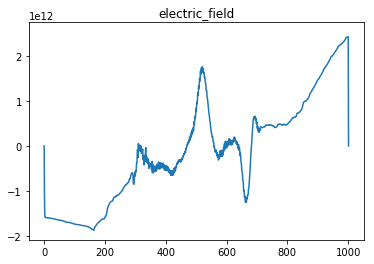

In [126]:
plot("electric_field")

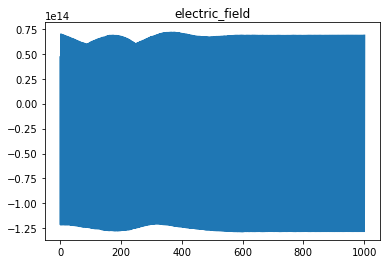

In [127]:
plot("electric_field", 1)